In [15]:
# -*- coding: utf-8 -*-
%matplotlib inline
%load_ext autoreload
%autoreload 2

# add path
import sys
my_path = r'D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1'
sys.path.insert(0,my_path + r'\code\COMMON')

# import
import numpy as np
import matplotlib.pyplot as plt
from t_optimize_hyperparameters import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Create a dataset

In [2]:
from build_poly import build_poly
from standard import standardize 

# number of samples in the dataset
num_data = 1000

# features
x = np.linspace(0.1, 2 * np.pi, num_data)
x = x[:, None]

# observations
offset = 1
noiseLevel = 0.8
y = np.sin(x[:,0]) + offset + noiseLevel * np.random.randn(num_data).T

# standardize 
x, mean_x, std_x = standardize(x)

print('x: ', x.shape)
print('y: ', y.shape)

x:  (1000, 1)
y:  (1000,)


# Tune degree of the polynomial basis function for ridge regression

tested degree:  [1 2 3 4 5 6]
Number of samples in total:  1000
Number of folds:  10  of 100 samples.
Mean training loss:  0.920157689537
Mean testing loss:  0.921570144967
Number of samples in total:  1000
Number of folds:  10  of 100 samples.
Mean training loss:  0.919774379043
Mean testing loss:  0.922484624867
Number of samples in total:  1000
Number of folds:  10  of 100 samples.
Mean training loss:  0.792685298934
Mean testing loss:  0.794207202749
Number of samples in total:  1000
Number of folds:  10  of 100 samples.
Mean training loss:  0.792393232327
Mean testing loss:  0.795318979687
Number of samples in total:  1000
Number of folds:  10  of 100 samples.
Mean training loss:  0.788094515966
Mean testing loss:  0.792493090957
Number of samples in total:  1000
Number of folds:  10  of 100 samples.
Mean training loss:  0.787581218576
Mean testing loss:  0.79250169432
------------------------
Optimal degree:  6
Associated testing loss:  0.676471904041


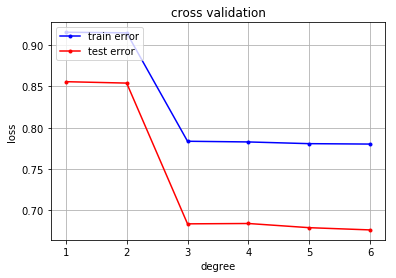

In [10]:
# ridge regression parameters
arg_rr = dict()
arg_rr['method'] = 'rr'
arg_rr['loss'] = 'rmse'
arg_rr['lambda_'] = 0
arg_rr['k_fold'] = 10

# optimization parameters
degree_min = 1 
degree_max = 7
degree_steps = 1

# optimize degree
lambda_opt = optimize_degree(y, x, degree_min, degree_max, degree_steps, arg_rr)

# Tune lambda_ (regularization) for ridge regression

tested lambda_:  [  1.00000000e-10   1.66810054e-09   2.78255940e-08   4.64158883e-07
   7.74263683e-06   1.29154967e-04   2.15443469e-03   3.59381366e-02
   5.99484250e-01   1.00000000e+01]
Number of samples in total:  1000
Number of folds:  10  of 100 samples.
Mean training loss:  0.792685299437
Mean testing loss:  0.794207203253
Number of samples in total:  1000
Number of folds:  10  of 100 samples.
Mean training loss:  0.792685307331
Mean testing loss:  0.794207211157
Number of samples in total:  1000
Number of folds:  10  of 100 samples.
Mean training loss:  0.792685438998
Mean testing loss:  0.794207343009
Number of samples in total:  1000
Number of folds:  10  of 100 samples.
Mean training loss:  0.792687635344
Mean testing loss:  0.794209542429
Number of samples in total:  1000
Number of folds:  10  of 100 samples.
Mean training loss:  0.792724271703
Mean testing loss:  0.794246230053
Number of samples in total:  1000
Number of folds:  10  of 100 samples.
Mean training loss:  0

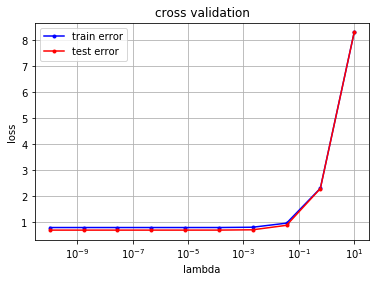

In [11]:
# ridge regression parameters
arg_rr = dict()
arg_rr['method'] = 'rr'
arg_rr['loss'] = 'rmse'
arg_rr['degree'] = 3
arg_rr['k_fold'] = 10

# optimization parameters
lambda_min = -10 
lambda_max = 1
lambda_steps = 10

# optimize lambda_
lambda_opt = optimize_lambda(y, x, lambda_min, lambda_max, lambda_steps, arg_rr)

# Tune gamma (step descent) for least square gradient descent

tested gamma:  [  1.00000000e-05   1.11200000e-02   2.22300000e-02   3.33400000e-02
   4.44500000e-02   5.55600000e-02   6.66700000e-02   7.77800000e-02
   8.88900000e-02   1.00000000e-01]
Number of samples in total:  1000
Number of folds:  10  of 100 samples.
Gradient Descent(9/9): loss MSE=1.0732664058187333
Gradient Descent(9/9): loss MSE=1.1031155033565518
Gradient Descent(9/9): loss MSE=1.1043467768757451
Gradient Descent(9/9): loss MSE=1.066145398835193
Gradient Descent(9/9): loss MSE=1.0600613659856304
Gradient Descent(9/9): loss MSE=1.0812637968162289
Gradient Descent(9/9): loss MSE=1.0882234573197227
Gradient Descent(9/9): loss MSE=1.089959875715535
Gradient Descent(9/9): loss MSE=1.0719826825309868
Gradient Descent(9/9): loss MSE=1.0919388301568702
Mean training loss:  1.47172224915
Mean testing loss:  1.46913559765
Number of samples in total:  1000
Number of folds:  10  of 100 samples.
Gradient Descent(9/9): loss MSE=0.8414590547717429
Gradient Descent(9/9): loss MSE=0.86285

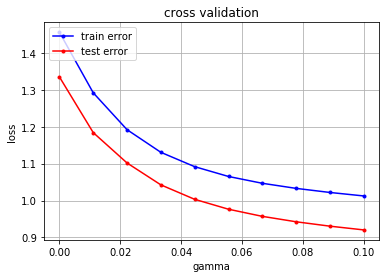

In [20]:
# least squares gradient descent parameters
arg_lsgd = dict()
arg_lsgd['method'] = 'lsgd'
arg_lsgd['loss'] = 'rmse'
arg_lsgd['degree'] = 3
arg_lsgd['k_fold'] = 10
arg_lsgd['max_iters'] = 10
arg_lsgd['initial_w'] = np.zeros(x.shape[1]*arg_lsgd['degree']+1)


# optimization parameters
gamma_min = 1e-5
gamma_max = 1e-1
gamma_steps = 10

# optimize lambda_
gamma_opt = optimize_gamma(y, x, gamma_min, gamma_max, gamma_steps, arg_lsgd)